## Predicting Heart Disease

- I used a kaggle dataset here to train the model, (source : https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)
- Using Logistic Regression to train the model
- Visualizing Heart Disease count over gender and age
- Model Accuracy : 0.842391304347826

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
#loading the dataset
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
#checking for null values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
#checking data details
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Text(0.5, 1.0, 'Heart Disease vs Sex (Male:0, Female:1)')

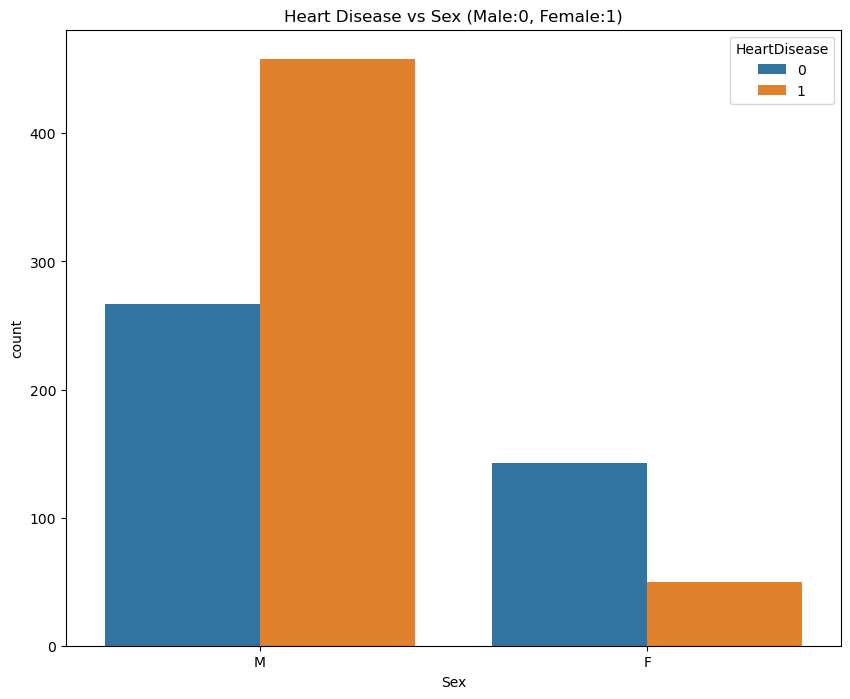

In [6]:
#Exploratory data analysis
#Heart disease over Gender
plt.figure(figsize=(10,8))
sns.countplot(x='Sex', hue='HeartDisease', data=df)
plt.title("Heart Disease vs Sex (Male:0, Female:1)")

Text(0.5, 1.0, 'Age vs Heart Disease')

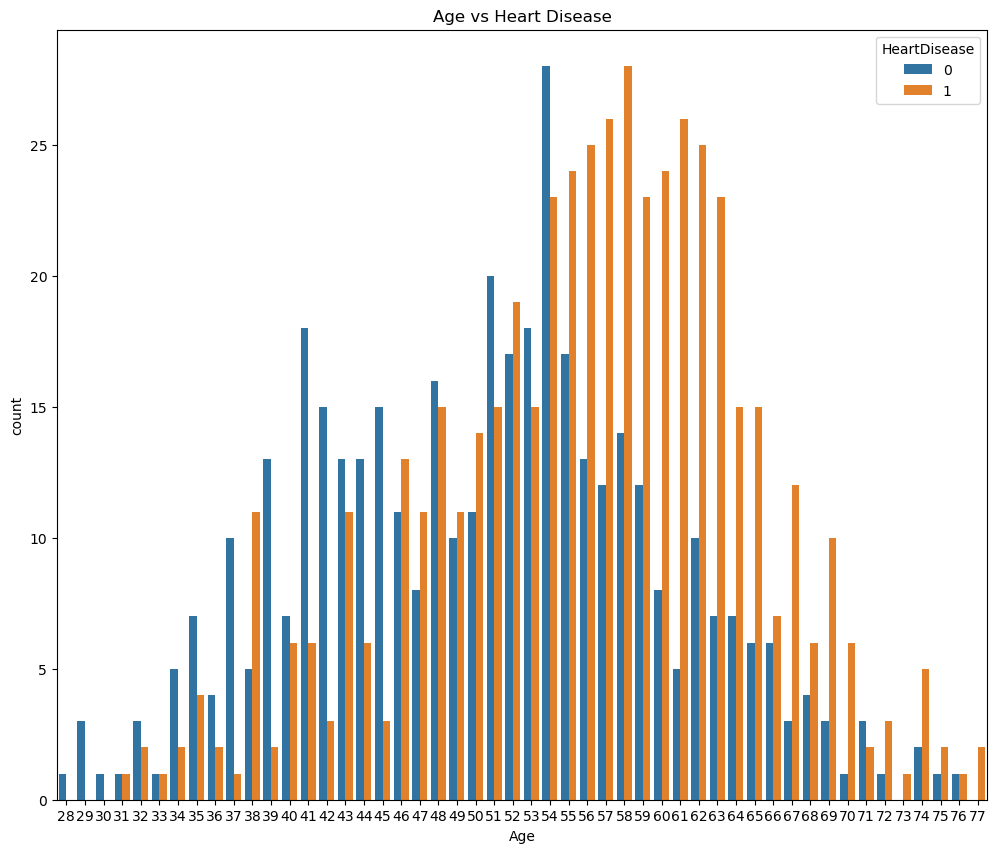

In [7]:
#Heart disease over Age
plt.figure(figsize=(12,10))
sns.countplot(x='Age', hue='HeartDisease', data=df)
plt.title("Age vs Heart Disease")

In [8]:
#feature engineering
df['Sex'] = df['Sex'].map({'M':0, 'F':1})
df['ChestPainType'] = df['ChestPainType'].map({'ATA':0, 'NAP':1, 'ASY':2, 'TA':3})
df['RestingECG'] = df['RestingECG'].map({'Normal':0, 'ST':1, 'LVH':2})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y':1, 'N':0})
df['ST_Slope'] = df['ST_Slope'].map({'Up':2, 'Flat':1, 'Down':0})

In [9]:
# train-test-split
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#training the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
#checking the prediction
y_pred = model.predict(X_test)

acc = accuracy_score(y_pred, y_test)
cm = confusion_matrix(y_pred, y_test)

print("Accuracy: ", acc)
print("\nConfusion_Matrix : ",cm)

Accuracy:  0.842391304347826

Confusion_Matrix :  [[65 17]
 [12 90]]


In [12]:
#saving the model
import pickle
with open('loan_model.pkl', 'wb') as file:
    pickle.dump(model, file)